<br><br>
<hr>
<center style="font-size:40px;">Machine Learning</center>
<br>
<center style="font-size:30px;">KNN Caravan</center>
<hr>

#### RONI FERNANDO 14/365951/PA/16166 
#### GHIFFARI AGSARYA ARLIN 14/364209/PA/15944 
#### PRABU FARHAN N J 14/365902/PA/16160 
#### MUAMMAR KHADAFI 15/378067/PA/16542 

<br>
# Inisiasi
<hr>
Menggunakan pandas dan numpy

In [1]:
import pandas as pd
import numpy as np

<br>
# Membuka file CSV
<hr>

In [2]:
df = pd.read_csv('C:/Users/EGT - Roni Fernando/Documents/Jupyter/caravan.csv')
df["Purchase"].value_counts()
df.head(5)

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,No
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,No
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,No
4,5,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No


<br>
# Tanpa Standarisasi
## Membagi data 80% training dan 20% Test 
<hr>

In [3]:
from sklearn.cross_validation import train_test_split
X = np.array(df.iloc[:,1:-1]) 
y = np.array(df['Purchase']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<br>
## Mencari nilai akurasi K=1,...,10
<hr>

In [4]:
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

myList = list(range(1,11))
neighbors = filter(lambda x: x != 0, myList)
cek = []
listakurasi = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = knn.fit(X_train, y_train).predict(X_test)
    from sklearn.metrics import accuracy_score
    print(k)
    print ("Accuracy = %.5f" % (accuracy_score(y_test, pred)))
    
    listakurasi.append(accuracy_score(y_test, pred))

1
Accuracy = 0.88240
2
Accuracy = 0.92876
3
Accuracy = 0.92361
4
Accuracy = 0.93047
5
Accuracy = 0.92961
6
Accuracy = 0.93047
7
Accuracy = 0.92961
8
Accuracy = 0.93047
9
Accuracy = 0.93047
10
Accuracy = 0.93047


<br>
## Membuat grafik dari nilai akurasi
<hr>

In [5]:
import matplotlib.pyplot as plt

plt.plot(np.append(np.roll(listakurasi,1),listakurasi[9]),'ro', color='r', linewidth=1.0, label="Graph2")
plt.axis([1, 10, 0.5,1])
plt.xlabel('K')
plt.ylabel('Akurasi')

plt.grid()
plt.show()

print(listakurasi)


[0.8824034334763948, 0.9287553648068669, 0.9236051502145923, 0.9304721030042918, 0.9296137339055794, 0.9304721030042918, 0.9296137339055794, 0.9304721030042918, 0.9304721030042918, 0.9304721030042918]


<br>
# Dengan Standarisasi
## Membagi data 80% training dan 20% Test 
<hr>

In [6]:
from sklearn import preprocessing
X = np.array(df.iloc[:,1:-1]).astype('float64')
y = np.array(df['Purchase'])
X_scaled = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<br>
## Mencari nilai akurasi K=1,...,10
<hr>

In [7]:
myList = list(range(1,11))
neighbors = filter(lambda x: x != 0, myList)
listakurasib = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = knn.fit(X_train, y_train).predict(X_test)
    from sklearn.metrics import accuracy_score
    print(k)
    print ("Accuracy = %.5f" % (accuracy_score(y_test, pred)))
    listakurasib.append(accuracy_score(y_test, pred))
    


1
Accuracy = 0.88069
2
Accuracy = 0.92446
3
Accuracy = 0.91502
4
Accuracy = 0.92790
5
Accuracy = 0.92446
6
Accuracy = 0.93047
7
Accuracy = 0.93047
8
Accuracy = 0.93047
9
Accuracy = 0.92876
10
Accuracy = 0.92961


<br>
## Membuat grafik dari nilai akurasi
<hr>

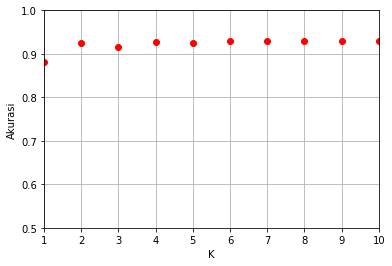

[0.8806866952789699, 0.9244635193133047, 0.9150214592274678, 0.9278969957081545, 0.9244635193133047, 0.9304721030042918, 0.9304721030042918, 0.9304721030042918, 0.9287553648068669, 0.9296137339055794]


In [15]:
plt.plot(np.append(np.roll(listakurasib,1),listakurasib[9]),'ro', color='r', linewidth=1.0, label="Graph2")
plt.axis([1, 10, 0.5, 1])
plt.xlabel('K')
plt.ylabel('Akurasi')

plt.grid()
plt.show()

print(listakurasib)

<br>
## Membuat grafik perbandingan nilai akurasi <a style="color:red;">tanpa standarisasi</h1> dan <div style="color:blue;">dengan standarisasi</div>
<hr>

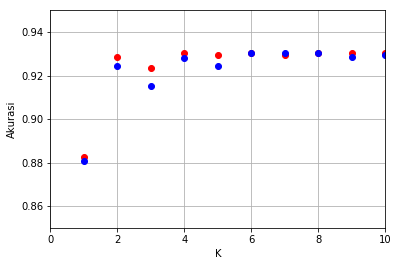

In [39]:
plt.plot(cek, listakurasi,'ro', color='r', linewidth=0.5, label="Graph2")
plt.plot(cek, listakurasib,'ro', color='b', linewidth=0.5, label="Graph2")
plt.axis([0, 10, 0.85, 0.95])
plt.xlabel('K')
plt.ylabel('Akurasi')
plt.grid()
plt.show()

<hr>
Visit : <a href="https://github.com/ronifernando/KNN-Python-using-Jupyter-Notebook">https://github.com/ronifernando/KNN-Python-using-Jupyter-Notebook</a>